# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [2]:
df=pd.read_excel('data_final.xlsx')
df=df.dropna()
df.head()

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,called morning told new love found said happy ...,call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,get busy chorus everybody talking stuff let li...,get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e
2,Poison,[Verse 1]\nWe both lie silently still in the d...,Hot100,3,Every Rose Has Its Thorn,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lie silently still dead night although lie clo...,lie silently still dead night although lie clo...,1,4f6283ee0b9f9e18763adb1c987b50c5e705dc13
3,Paula Abdul,[Verse 1]\nLost in a dream\nI don't know which...,Hot100,4,Straight Up,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,lost dream know way go ahlet say seem baby mov...,lose dream know way go ahlet say seem baby mov...,1,cace324cef06cc6e71ec16470a97dd20390d3491
4,Janet Jackson,[Verse 1]\nShot like an arrow going through my...,Hot100,5,Miss You Much,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,shot like arrow going heart pain feel feel whe...,shoot like arrow go heart pain feel feel whene...,1,15ae333443d0bb5dde729d4f05989ff860531cde


# Artist Analysis

1. Number of songs from top artists that made it to the bill board maximum number of times from 1989-2018

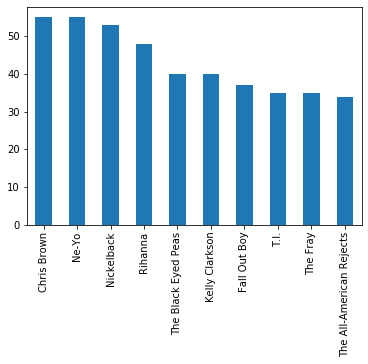

In [3]:
df['artist'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

2. How many in No.1s?

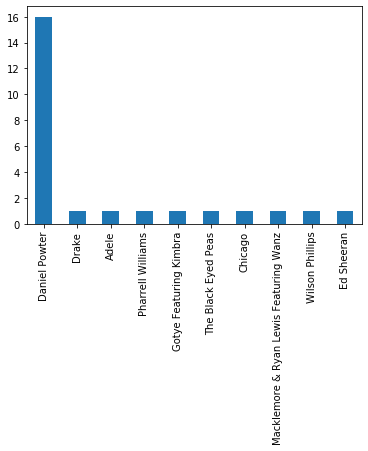

In [4]:
df[df['rank']==1]['artist'].value_counts().\
sort_values(ascending=False)[:10].plot(kind='bar')

This is interesting! Ne-Yo who made it to 100 billboard most often did not make ever as the no.1. Daniel Powter has made it lesser number of times, but seems like when he made it, he was the best!

3. How many in top 10?

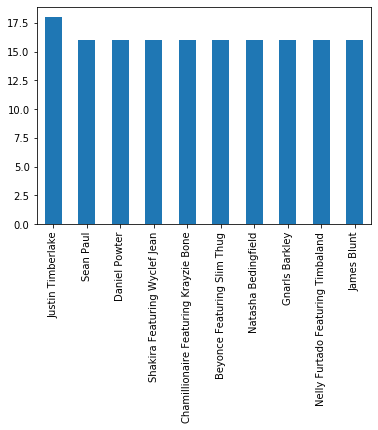

In [5]:
df[(df['rank']>0)&(df['rank']<11)]['artist'].value_counts().\
sort_values(ascending=False)[:10].plot(kind='bar')

# Word Analysis 

1. Most used words in lyrics?

In [6]:
# pip install wordcloud

In [7]:
df['lyrics_clean'] = df['lyrics_lem'].str.split()
df['lyrics_clean'] = df['lyrics_clean'].apply\
(lambda lyric :[word for word in lyric if word not in stop])

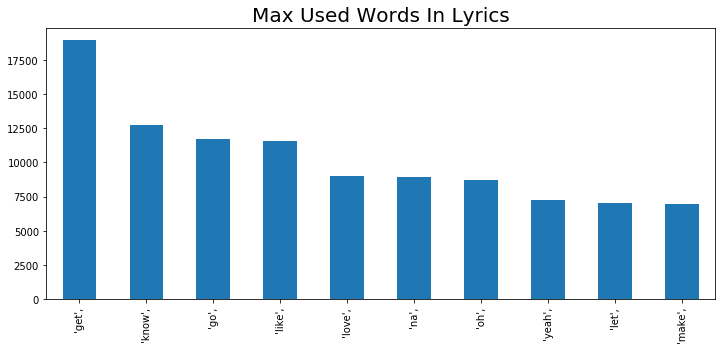

In [8]:
plt.figure(figsize=(12,5))
plt.title("Max Used Words In Lyrics",fontsize=20)
words = pd.Series(' '.join(df['lyrics_clean'].astype(str)).lower().\
                  split(" ")).value_counts()[:10]
words.plot(kind='bar')

2. Wordcloud of the song titles - theme of the song

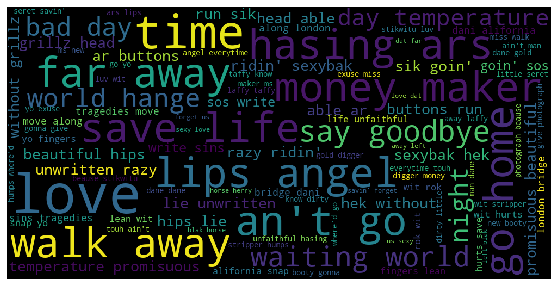

In [9]:
allwords = ' '.join(df['song']).lower().replace('c', '')
cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=100,
                            relative_scaling=.5).generate(allwords)
plt.figure(figsize=(15,5))
plt.axis('off')

plt.imshow(cloud);

Love - big theme over the years

3. Word cloud of lyrics used

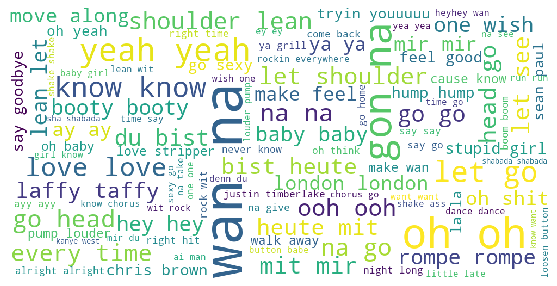

In [10]:
allwords = ' '.join(df['lyrics_lem']).lower()
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=100,
                            relative_scaling=.5).generate(allwords)
plt.figure(figsize=(15,5))
plt.axis('off')

plt.imshow(cloud);

4. Most used Bigrams and Trigrams

In [11]:
#Bigrams - based on TF
word_vectorizer = CountVectorizer(ngram_range=(2,2),stop_words='english',
                                  analyzer ='word',max_features=25)
bigrams=word_vectorizer.fit(df['lyrics_lem']).vocabulary_
bigrams

{'wan na': 22,
 'oh oh': 17,
 'gon na': 5,
 'love love': 13,
 'know know': 8,
 'na na': 16,
 'feel like': 4,
 'ya ya': 23,
 'like like': 12,
 'baby baby': 0,
 'yeah yeah': 24,
 'hey hey': 7,
 'ooh ooh': 19,
 'du bist': 3,
 'bist heute': 1,
 'heute mit': 6,
 'mit mir': 15,
 'mir mir': 14,
 'oh shit': 18,
 'booty booty': 2,
 'laffy taffy': 9,
 'shoulder lean': 21,
 'let shoulder': 11,
 'lean let': 10,
 'rompe rompe': 20}

In [12]:
#Tigrams - based on TF

tri = CountVectorizer(ngram_range=(3,3),max_features=25,
                      stop_words='english',analyzer ='word')
trigrams=tri.fit(df['lyrics_lem']).vocabulary_
trigrams

{'oh oh oh': 18,
 'na na na': 17,
 'know know know': 10,
 'love love love': 14,
 'hey hey hey': 7,
 'yeah yeah yeah': 24,
 'make wan na': 15,
 'ooh ooh ooh': 20,
 'head sexy head': 5,
 'sexy head sexy': 22,
 'denn du bist': 3,
 'du bist heute': 4,
 'bist heute mit': 1,
 'heute mit mir': 6,
 'mir mir mir': 16,
 'oh think like': 19,
 'booty booty booty': 2,
 'hump hump hump': 9,
 'ay ay ay': 0,
 'let shoulder lean': 12,
 'shoulder lean let': 23,
 'lean let shoulder': 11,
 'rompe rompe rompe': 21,
 'louder pump louder': 13,
 'heyhey wan na': 8}

'yeah yeah yeah' and 'shoulder lean let' - most used trigrams : seems to coincide with the love theme

# Artists and Lyrics

1. Who are the artists with long songs?

2. What are the top words used by artists who have made it to the bill-board max times?

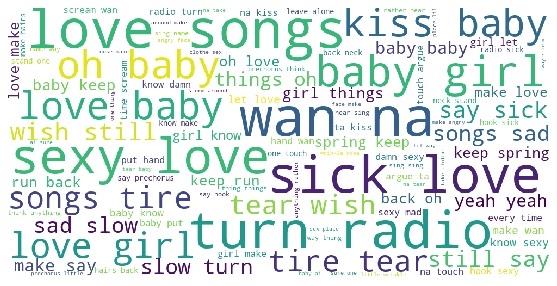

In [20]:
#Ne-Yo
df_ne_yo=df[df['artist']=='Ne-Yo']
allwords = ' '.join(df_ne_yo['lyrics_lem']).lower()
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=100,
                            relative_scaling=.5).generate(allwords)
plt.figure(figsize=(15,5))
plt.axis('off')

plt.imshow(cloud);

Seems to write more on love.

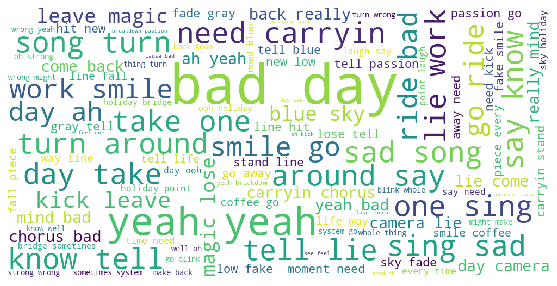

In [19]:
#Daniel Powter
df_daniel=df[df['artist']=='Daniel Powter']
allwords = ' '.join(df_daniel['lyrics_lem']).lower()
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=100,
                            relative_scaling=.5).generate(allwords)
plt.figure(figsize=(15,5))
plt.axis('off')

plt.imshow(cloud);

Still love - but more subtly

# Sentiment Analysis

In [14]:
# pip install vaderSentiment
#sentiment analyser
analyser = SentimentIntensityAnalyzer()

#getting the sentiment scores
list1=[]
for i in range(0,df.shape[0]):
    list1.append(analyser.polarity_scores(df['lyrics_lem'][i]))

#into a dataframe
list_of_score=pd.DataFrame(list1)
df=df.merge(list_of_score,left_index=True, right_index=True)
df.head()

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id,compound,neg,neu,pos
0,Chicago,[Verse 1]\nWhen you called me up this morning\...,Hot100,1,Look Away,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,"[call, morning, tell, new, love, find, say, ha...",call morning tell new love find say happy real...,1,4fb25ccd98e9aff41259ccc11c3c636609180e8e,0.9937,0.022,0.677,0.302
1,Bobby Brown,Get busy!\n\n[Chorus]\nEverybody's talking all...,Hot100,2,My Prerogative,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,"[get, busy, chorus, everybody, talk, stuff, le...",get busy chorus everybody talk stuff let live ...,1,db815992930d3614142c44154b78798028c7207e,-0.6494,0.090,0.847,0.063
2,Poison,[Verse 1]\nWe both lie silently still in the d...,Hot100,3,Every Rose Has Its Thorn,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,"[lie, silently, still, dead, night, although, ...",lie silently still dead night although lie clo...,1,4f6283ee0b9f9e18763adb1c987b50c5e705dc13,0.9423,0.163,0.588,0.249
3,Paula Abdul,[Verse 1]\nLost in a dream\nI don't know which...,Hot100,4,Straight Up,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,"[lose, dream, know, way, go, ahlet, say, seem,...",lose dream know way go ahlet say seem baby mov...,1,cace324cef06cc6e71ec16470a97dd20390d3491,0.9991,0.045,0.488,0.467
4,Janet Jackson,[Verse 1]\nShot like an arrow going through my...,Hot100,5,Miss You Much,https://www.billboard.com/charts/year-end/1989...,hot-100-songs,1989,"[shoot, like, arrow, go, heart, pain, feel, fe...",shoot like arrow go heart pain feel feel whene...,1,15ae333443d0bb5dde729d4f05989ff860531cde,-0.9739,0.311,0.576,0.113


Artists who do positive/neutral sentiment songs

In [28]:
df[df['compound']>0]['artist'].value_counts()[:10]

Ne-Yo                  53
Nickelback             53
The Black Eyed Peas    39
Chris Brown            38
Rihanna                31
Kelly Clarkson         23
Justin Timberlake      21
Bon Jovi               19
Taylor Swift           19
Fall Out Boy           18
Name: artist, dtype: int64

Artists who do negative sentiment songs

In [29]:
df[df['compound']<0]['artist'].value_counts()[:10]

Fall Out Boy                19
P!nk                        18
The All-American Rejects    18
Akon Featuring Eminem       17
T.I.                        17
Snow Patrol                 17
The Fray                    17
Chris Brown                 17
Rihanna                     17
Kelly Clarkson              17
Name: artist, dtype: int64

P!ink seems to be all negative, while Fall-Out Boy seems to balance both pos/neu with negative sentiment. Rihanna more pos/neu based songs than neg.